### Perform PCA/EOF Analysis

Assumptions for PCA/EOF analysis:
- data is not auto-correlated in the dimension which will be reduced (usually time (S-mode), or space (T-mode))
- data are multivariate normal
- variability is linear (often violated)
- no noise in the data (always violated)

2 methods to compute PCA/EOF:
1. Eigendecomposition of the covariance matrix
2. **OR** singular value decomposition (computationally more effective), chosen here

In [1]:
# Importing Standard libraries ...
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing EOF package for testing
from xeofs.xarray import EOF,Rotator # see https://github.com/nicrie/xeofs

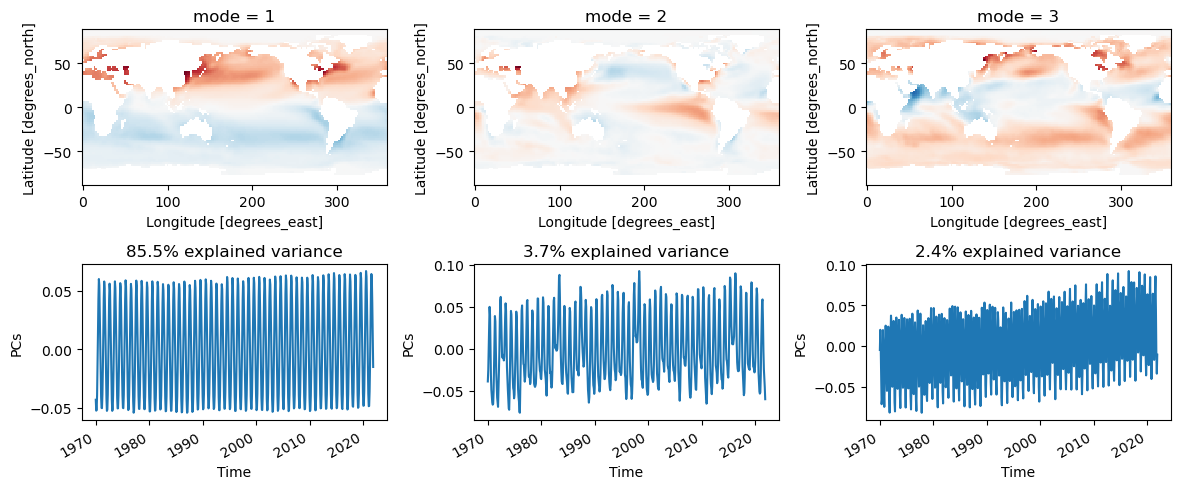

In [3]:
# load test dataset and plot overview (standard deviation)
ds  = xr.tutorial.open_dataset('ersstv5')
sst = ds['sst']

# introduce some nan for robustness tests 
# nan_mask = np.where(np.random.randint(100*np.ones((sst.shape)))==0,0,1)
# sst = sst.where(nan_mask)

# Apply package to the data and plot results:
model = EOF(sst, n_modes=5, norm=False, dim=['time'],weights='coslat')
model.solve()
expvars = model.explained_variance_ratio()
eofs = model.eofs().transpose('mode','lat','lon')
pcs = model.pcs().transpose('mode','time')
fig,axes = plt.subplots(2,3,figsize=(12,5))
for eof,pc,expvar,ax in zip(eofs,pcs,expvars,axes.transpose()):
    eof.plot(ax=ax[0],add_colorbar=False)
    pc.plot(ax=ax[1])
    ax[1].set_title(f'{np.round(expvar.values*100,1)}% explained variance')
plt.tight_layout()

Where the first mode represents the seasonal cycle, the second corresponds to ENSO and the third could be attributed to a trend (global warming).

#### Rotated version:

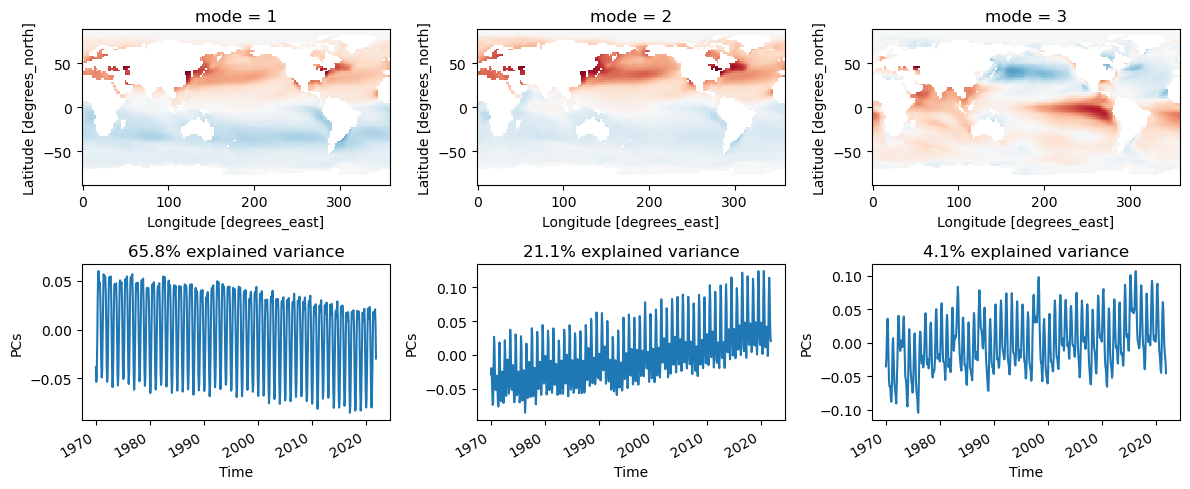

In [4]:
model_rotated = Rotator(model,n_rot=50,power=1)
expvars = model_rotated.explained_variance_ratio()
eofs = model_rotated.eofs().transpose('mode','lat','lon')
pcs = model_rotated.pcs().transpose('mode','time')
fig,axes = plt.subplots(2,3,figsize=(12,5))
for eof,pc,expvar,ax in zip(eofs,pcs,expvars,axes.transpose()):
    eof.plot(ax=ax[0],add_colorbar=False)
    pc.plot(ax=ax[1])
    ax[1].set_title(f'{np.round(expvar.values*100,1)}% explained variance')
plt.tight_layout()

### Own Implementation

In [6]:
from PCA import pca
# rotation does not work yet..

pcs, eofs, expvars = pca(sst, dim='time',normalize=False,coslat_weights='lat',detrend_degree=0,rotate=True)

fig,axes = plt.subplots(2,3,figsize=(12,5))
for eof,pc,expvar,ax in zip(eofs,pcs,expvars,axes.transpose()):
    eof.plot(ax=ax[0],add_colorbar=False)
    pc.plot(ax=ax[1])
    ax[1].set_title(f'{np.round(expvar.values*100,1)}% explained variance')
plt.tight_layout()

19151.412


UserWarning: This option does not work yet. Please make use of an already existing implementation (https://github.com/nicrie/xeofs)

In [ ]:
#TEST